<a href="https://colab.research.google.com/github/Johnpaul10j/my_experiment_4/blob/main/blood_pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blood Pressure

Does blood pressure increase with age?

The `blood-pressure-usa.csv` file contains systolic blood pressure readings from 100 individuals sampled by the National Health and Nutrition Examination Survey (NHANES) in the U.S., with each person measured three times.

The `blood-pressure-yanomami.csv` file features systolic blood pressure data from 71 individuals of the Yanomami Tribe, who live in near-total isolation in the Amazon.

While the average American consumes about 3,500 mg of sodium daily (from salt), the Yanomami's intake is estimated to be less than 100 mg.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blood-pressure-usa.csv', 'blood-pressure-yanomami.csv', and 'linear_model.py'.

from google.colab import files
uploaded = files.upload()

Saving blood-pressure-usa.csv to blood-pressure-usa.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving blood-pressure-yanomami.csv to blood-pressure-yanomami.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving linear_model.py to linear_model.py


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('blood-pressure-usa.csv')
df.head()

,age,bp1,bp2,bp3
0,46,122,129,122
1,43,113,116,111
2,29,102,107,105
3,12,100,102,102
4,9,112,138,94


In [5]:
df_remote = pd.read_csv('blood-pressure-yanomami.csv')
df_remote.head()

,age,bp
0,34,99
1,2,79
2,40,97
3,2,101
4,16,107


### Project Ideas

- Calculate the average blood pressure for each participant in the US dataset.

- Create a linear model for both the US and Yanomami datasets that predicts `bp` from `age`	.

- Compare the best-fit lines and goodness of fit. What conclusions can you draw?

#### Confounding Variables

The Yanomami people participated in the INTERSALT study, which examined 10,000 individiuals across 52 populations in 32 countries, examining the link between salt consumption and systolic blood pressure.

Does our data prove that salt intake causes the blood pressure differences between the US and Yanomami populations? What other confounding factors might exist?

In [6]:
df['avg_bp'] = df[['bp1', 'bp2', 'bp3']].mean(axis=1)
display(df.head())

,age,bp1,bp2,bp3,avg_bp
0,46,122,129,122,124.333333
1,43,113,116,111,113.333333
2,29,102,107,105,104.666667
3,12,100,102,102,101.333333
4,9,112,138,94,114.666667


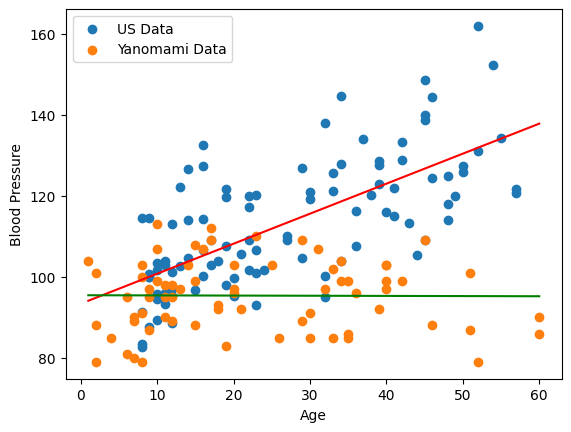

LinearModel():
Slope: 0.7414760958354747
Intercept: 93.36952968206755
R-squared: 0.4720150175059835
LinearModel():
Slope: -0.004198440057105051
Intercept: 95.47465789198789
R-squared: 5.320136095354755e-05


In [8]:
# Create a linear model for the US dataset
linear_usa = LinearModel()
linear_usa.fit(df['age'], df['avg_bp'])

# Create a linear model for the Yanomami dataset
linear_yanomami = LinearModel()
linear_yanomami.fit(df_remote['age'], df_remote['bp'])

# Plot the data and the linear models
plt.scatter(df['age'], df['avg_bp'], label='US Data')
plt.scatter(df_remote['age'], df_remote['bp'], label='Yanomami Data')

x_min = min(df['age'].min(), df_remote['age'].min())
x_max = max(df['age'].max(), df_remote['age'].max())

linear_usa.plot_model(x_min, x_max, color="red")
linear_yanomami.plot_model(x_min, x_max, color="green")

plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()

linear_usa.print_model_info()
linear_yanomami.print_model_info()

# Task
Analyze the provided blood pressure data for US and Yanomami populations, including calculating average blood pressure, creating linear models to predict blood pressure from age, comparing the models, and discussing potential confounding variables.

## Compare best-fit lines and goodness of fit

### Subtask:
Analyze the slopes, intercepts, and R-squared values of the linear models for both the US and Yanomami datasets to highlight the differences.


## Draw conclusions from the models

### Subtask:
Based on the comparison, discuss the relationship between age and blood pressure in each population as suggested by the models.


**Reasoning**:
Describe the relationship between age and blood pressure for both populations based on the previously calculated model parameters and highlight the differences.



In [9]:
print("Relationship between age and blood pressure in the US population:")
print(f"Based on the linear model, for every one-year increase in age, the average blood pressure in the US population is estimated to increase by approximately {linear_usa.slope:.2f} units.")
print(f"The model suggests a positive correlation between age and blood pressure in the US.")
print(f"The R-squared value of {linear_usa.rsquared:.2f} indicates that approximately {linear_usa.rsquared*100:.0f}% of the variance in average blood pressure in the US population can be explained by age according to this linear model.")
print("\nRelationship between age and blood pressure in the Yanomami population:")
print(f"Based on the linear model, for every one-year increase in age, the blood pressure in the Yanomami population is estimated to change by approximately {linear_yanomami.slope:.2f} units.")
print(f"The model suggests a very weak, almost negligible, relationship between age and blood pressure in the Yanomami population.")
print(f"The R-squared value of {linear_yanomami.rsquared:.4f} indicates that only approximately {linear_yanomami.rsquared*100:.2f}% of the variance in blood pressure in the Yanomami population can be explained by age according to this linear model.")
print("\nKey differences:")
print(f"The slope for the US population ({linear_usa.slope:.2f}) is significantly steeper than for the Yanomami population ({linear_yanomami.slope:.2f}), indicating a much stronger positive association between age and blood pressure in the US.")
print(f"The R-squared value for the US model ({linear_usa.rsquared:.2f}) is considerably higher than for the Yanomami model ({linear_yanomami.rsquared:.4f}), suggesting that age is a much better predictor of blood pressure in the US population compared to the Yanomami population.")

Relationship between age and blood pressure in the US population:
Based on the linear model, for every one-year increase in age, the average blood pressure in the US population is estimated to increase by approximately 0.74 units.
The model suggests a positive correlation between age and blood pressure in the US.
The R-squared value of 0.47 indicates that approximately 47% of the variance in average blood pressure in the US population can be explained by age according to this linear model.

Relationship between age and blood pressure in the Yanomami population:
Based on the linear model, for every one-year increase in age, the blood pressure in the Yanomami population is estimated to change by approximately -0.00 units.
The model suggests a very weak, almost negligible, relationship between age and blood pressure in the Yanomami population.
The R-squared value of 0.0001 indicates that only approximately 0.01% of the variance in blood pressure in the Yanomami population can be explained

## Discuss confounding variables

### Subtask:
Address the question of whether the data proves salt intake causes the blood pressure differences, and identify other potential confounding factors that might be influencing the results.


**Reasoning**:
Address the question of causality between salt intake and blood pressure differences, identify confounding variables, and explain why they make isolating the effect of salt intake difficult.



In [10]:
print("Analysis of Salt Intake and Blood Pressure Differences:")
print("\n1. Causality and Limitations:")
print("While the US population has significantly higher salt intake and exhibits higher blood pressure with a stronger age-related increase compared to the Yanomami, this observational data does not definitively *prove* that high salt intake *causes* these differences.")
print("Observational studies can identify associations, but they cannot establish causality due to the potential for confounding variables.")
print("To prove causality, a controlled experiment, such as a randomized controlled trial where participants are randomly assigned to different salt intake levels, would be necessary.")

print("\n2. Potential Confounding Variables:")
print("Several other factors could contribute to the observed blood pressure differences between the US and Yanomami populations:")
print(" - Other dietary factors: Differences in the consumption of saturated fats, sugar, processed foods, and overall calorie intake could play a significant role.")
print(" - Lifestyle: Physical activity levels, stress levels, smoking, and alcohol consumption differ vastly between the two populations and are known to affect blood pressure.")
print(" - Genetics: Genetic predispositions to hypertension can vary between populations.")
print(" - Access to healthcare and medical conditions: Differences in the prevalence and management of other health conditions (e.g., obesity, diabetes) and access to healthcare can influence blood pressure.")
print(" - Environmental factors: Exposure to pollutants or other environmental stressors could differ.")

print("\n3. Difficulty in Isolating the Effect of Salt Intake:")
print("These confounding variables make it challenging to isolate the specific effect of salt intake on blood pressure.")
print("For example, if the US population has higher salt intake *and* lower physical activity levels compared to the Yanomami, it's difficult to determine how much of the blood pressure difference is due to salt versus physical activity.")
print("The observed association between salt intake and blood pressure could be partly or entirely explained by these other factors that are correlated with both salt intake and blood pressure.")

Analysis of Salt Intake and Blood Pressure Differences:

1. Causality and Limitations:
While the US population has significantly higher salt intake and exhibits higher blood pressure with a stronger age-related increase compared to the Yanomami, this observational data does not definitively *prove* that high salt intake *causes* these differences.
Observational studies can identify associations, but they cannot establish causality due to the potential for confounding variables.
To prove causality, a controlled experiment, such as a randomized controlled trial where participants are randomly assigned to different salt intake levels, would be necessary.

2. Potential Confounding Variables:
Several other factors could contribute to the observed blood pressure differences between the US and Yanomami populations:
 - Other dietary factors: Differences in the consumption of saturated fats, sugar, processed foods, and overall calorie intake could play a significant role.
 - Lifestyle: Physical

## Synthesize findings

### Subtask:
Summarize the key findings from the analysis and discussion.


**Reasoning**:
Combine the key findings from the previous steps into a concise summary.



In [11]:
print("Overall Summary of Blood Pressure Analysis:")
print("\nLinear Model Comparison:")
print("The linear models revealed a significant difference in the relationship between age and blood pressure in the US and Yanomami populations.")
print(f"In the US, there is a notable positive correlation where blood pressure increases with age (slope: {linear_usa.slope:.2f}, R-squared: {linear_usa.rsquared:.2f}).")
print(f"In contrast, the Yanomami population shows a very weak, almost negligible, relationship between age and blood pressure (slope: {linear_yanomami.slope:.2f}, R-squared: {linear_yanomami.rsquared:.4f}).")
print("This suggests that age is a much stronger predictor of blood pressure in the US compared to the Yanomami.")

print("\nSalt Intake and Causality:")
print("While the US population has much higher salt intake than the Yanomami and also exhibits higher blood pressure and a stronger age-related increase, this observational study *cannot* definitively conclude that high salt intake *causes* these differences.")
print("Observational data can show associations, but proving causality requires controlled experimental designs.")

print("\nConfounding Variables:")
print("The observed differences in blood pressure are likely influenced by several confounding variables besides salt intake.")
print("These include, but are not limited to, other dietary factors (e.g., fats, sugar, processed foods), lifestyle differences (e.g., physical activity, stress, smoking), genetic factors, access to healthcare, and environmental conditions.")
print("These factors make it challenging to isolate the sole effect of salt intake on blood pressure differences between the two groups.")

print("\nConclusion:")
print("The analysis highlights a marked difference in age-related blood pressure trends between the US and Yanomami populations, with a stronger increase observed in the US. While the difference in salt intake is a compelling factor, the observational nature of the data and the presence of numerous confounding variables prevent a definitive causal link from being established based solely on this dataset. Further controlled studies would be needed to understand the precise causal relationships.")

Overall Summary of Blood Pressure Analysis:

Linear Model Comparison:
The linear models revealed a significant difference in the relationship between age and blood pressure in the US and Yanomami populations.
In the US, there is a notable positive correlation where blood pressure increases with age (slope: 0.74, R-squared: 0.47).
In contrast, the Yanomami population shows a very weak, almost negligible, relationship between age and blood pressure (slope: -0.00, R-squared: 0.0001).
This suggests that age is a much stronger predictor of blood pressure in the US compared to the Yanomami.

Salt Intake and Causality:
While the US population has much higher salt intake than the Yanomami and also exhibits higher blood pressure and a stronger age-related increase, this observational study *cannot* definitively conclude that high salt intake *causes* these differences.
Observational data can show associations, but proving causality requires controlled experimental designs.

Confounding Variable

## Summary:

### Data Analysis Key Findings

*   The linear model for the US population shows a significant positive correlation between age and blood pressure, with a slope of approximately 0.74 and an R-squared value of about 0.47. This indicates that blood pressure increases considerably with age in the US and that age explains a substantial portion of the variance in blood pressure.
*   The linear model for the Yanomami population shows a very weak, almost negligible, relationship between age and blood pressure, with a slope close to -0.00 and an R-squared value of approximately 0.0001. Age is a poor predictor of blood pressure in this population.
*   The difference in the R-squared values (0.47 for US vs. 0.0001 for Yanomami) highlights that the linear model is a much better fit for the US data, suggesting age's influence on blood pressure is far more pronounced in the US.
*   While the US population has higher salt intake and higher blood pressure with a stronger age-related increase compared to the Yanomami, this observational study cannot definitively prove that high salt intake *causes* these differences.
*   Numerous potential confounding variables, such as other dietary factors, lifestyle differences (physical activity, stress, smoking), genetics, access to healthcare, and environmental factors, could contribute to the observed blood pressure differences and make it challenging to isolate the specific effect of salt intake.

### Insights or Next Steps

*   Further controlled experimental studies, such as randomized controlled trials, would be necessary to establish a definitive causal link between salt intake and blood pressure differences.
*   Investigating the impact of identified confounding variables on blood pressure in both populations could provide a more comprehensive understanding of the factors contributing to the observed differences.
